In [6]:
import pandas as pd

from importlib.machinery import SourceFileLoader
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DI = SourceFileLoader("DI", "src/DI.py").load_module()

Handler = DI.Handler.Handler()
Graph = DI.Graph.Graph()
AlgoML = DI.AlgoML.AlgoML()
Refine = DI.Refine.Refine()

_data_train = pd.read_csv("/home/agl/codenation/20200530_DS_codenationModule8/1.Original/train.csv")
_data_test = pd.read_csv("/home/agl/codenation/20200530_DS_codenationModule8/1.Original/test.csv")

print(f"shape train --> {_data_train.shape} \t shape test --> {_data_test.shape}")

shape train --> (13730, 167) 	 shape test --> (4576, 47)


In [92]:
_data_train[["NU_NOTA_MT", "NU_NOTA_LC"]].head(10)

,NU_NOTA_MT,NU_NOTA_LC
0,399.4,581.2
1,459.8,599.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,364.5,410.9
6,529.2,484.5
7,566.7,611.2
8,372.4,521.8
9,NaN,NaN


In [70]:
#who are our object into dataframe? should us care about them?
_data_train.dtypes[_data_train.dtypes == "object"]

NU_INSCRICAO                   object
NO_MUNICIPIO_RESIDENCIA        object
SG_UF_RESIDENCIA               object
TP_SEXO                        object
NO_MUNICIPIO_NASCIMENTO        object
SG_UF_NASCIMENTO               object
NO_MUNICIPIO_ESC               object
SG_UF_ESC                      object
NO_ENTIDADE_CERTIFICACAO       object
SG_UF_ENTIDADE_CERTIFICACAO    object
NO_MUNICIPIO_PROVA             object
SG_UF_PROVA                    object
CO_PROVA_CN                    object
CO_PROVA_CH                    object
CO_PROVA_LC                    object
CO_PROVA_MT                    object
TX_RESPOSTAS_CN                object
TX_RESPOSTAS_CH                object
TX_RESPOSTAS_LC                object
TX_RESPOSTAS_MT                object
TX_GABARITO_CN                 object
TX_GABARITO_CH                 object
TX_GABARITO_LC                 object
TX_GABARITO_MT                 object
Q001                           object
Q002                           object
Q003        

In [67]:
corr_mat = _data_train.corr()["NU_NOTA_MT"]
columns_corr_mat = corr_mat[(corr_mat > 0.4) | (corr_mat < -0.2)]
columns_corr_mat

NU_NOTA_CN    0.584941
NU_NOTA_CH    0.529594
NU_NOTA_LC    0.494695
NU_NOTA_MT    1.000000
TP_LINGUA    -0.201726
Q037         -0.265249
Q038         -0.202259
Name: NU_NOTA_MT, dtype: float64

In [64]:
#see which of columns above also are on dataset of test
names_columns_corr_mat = columns_corr_mat.index

set(names_columns_corr_mat).intersection(set(_data_test.columns))

{'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'TP_LINGUA'}

In [74]:
#by bias i gonna add it
_data_train["TP_LINGUA"].isna().sum()

0

In [76]:
set_train = set(Refine.filter_columns_percent_null(_data_train, 0.3))
set_test = set(Refine.filter_columns_percent_null(_data_test, 0.3))

features = list(set_train.intersection(set_test))

print(f"The useful variable are: \n\n{features}")

The useful variable are: 

['TP_STATUS_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_COMP2', 'NU_NOTA_COMP4', 'NU_NOTA_CN', 'NU_NOTA_COMP1', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3', 'NU_NOTA_COMP5']


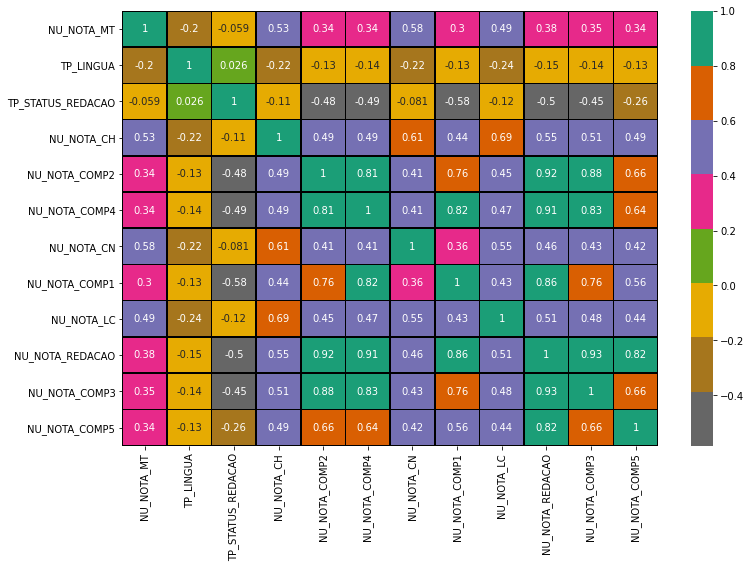

In [77]:
heatmap_features = ["NU_NOTA_MT", "TP_LINGUA"] + features
plt.subplots(figsize=(12, 8))
sns.heatmap(_data_train[heatmap_features].corr(), annot=True, cmap="Dark2_r", linewidths=0.5, linecolor="Black")

In [87]:
_data_train[heatmap_features].describe()
#std of NU_NOTA_REDACAO is the biggest, maybe could be a good option discretize it in quantile?

,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_CH,NU_NOTA_COMP2,NU_NOTA_COMP4,NU_NOTA_CN,NU_NOTA_COMP1,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP3,NU_NOTA_COMP5
count,10133.000000,13730.000000,10133.000000,10341.000000,10133.000000,10133.000000,10341.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,482.497928,0.593664,1.101747,529.661087,111.915918,113.123951,473.495155,119.811704,516.472841,529.048258,106.824238,77.372446
std,99.826323,0.491167,0.700100,73.726344,33.737588,33.480033,71.093674,29.846017,68.688190,154.294758,34.341349,43.067140
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,408.900000,0.000000,1.000000,480.400000,100.000000,100.000000,419.900000,120.000000,468.100000,440.000000,80.000000,40.000000
50%,461.200000,1.000000,1.000000,532.000000,120.000000,120.000000,459.800000,120.000000,520.900000,540.000000,120.000000,80.000000
75%,537.600000,1.000000,1.000000,581.200000,120.000000,120.000000,514.500000,140.000000,564.900000,600.000000,120.000000,100.000000
max,952.000000,1.000000,9.000000,807.000000,200.000000,200.000000,806.400000,200.000000,763.600000,1000.000000,200.000000,200.000000


In [78]:
train_imputed = _data_train[heatmap_features]
train_imputed = pd.DataFrame(Refine.imputer_na(train_imputed, "median"), columns=train_imputed.columns)

train_imputed_standard = Refine.standardize(train_imputed).transform(train_imputed)
train_imputed_standard = pd.DataFrame(train_imputed_standard, columns=train_imputed.columns)

train_imputed_normalized = Refine.normalize(train_imputed).transform(train_imputed)
train_imputed_normalized = pd.DataFrame(train_imputed_normalized, columns=train_imputed.columns)

features_rfe = Handler.RFE(train_imputed, "NU_NOTA_MT", 7)
print(f"PCA 90% obtido features_imputed: \n {Handler.PCA(train_imputed, 0.90)}\n RFE de 7 features:\n{features_rfe[0][0:]}")

features_standard_rfe = Handler.RFE(train_imputed_standard, "NU_NOTA_MT", 10)
print(f"\nPCA 90% features_standard: \n {Handler.PCA(train_imputed_standard, 0.90)}\n RFE de 10 features:\n{features_standard_rfe[0][0:]}")

features_normalized_rfe = Handler.RFE(train_imputed_normalized, "NU_NOTA_MT", 10)
print(f"\nPCA 90% features_normalized: \n {Handler.PCA(train_imputed_normalized, 0.90)}\n RFE de 10 features:\n{features_normalized_rfe[0][0:]}")

PCA 90% obtido features_imputed: 
 3
 RFE de 7 features:
['TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP2', 'NU_NOTA_CN', 'NU_NOTA_COMP1', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3']

PCA 90% features_standard: 
 7
 RFE de 10 features:
['TP_STATUS_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_COMP2', 'NU_NOTA_COMP4', 'NU_NOTA_CN', 'NU_NOTA_COMP1', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3', 'NU_NOTA_COMP5']

PCA 90% features_normalized: 
 3
 RFE de 10 features:
['TP_STATUS_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_COMP2', 'NU_NOTA_COMP4', 'NU_NOTA_CN', 'NU_NOTA_COMP1', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP3', 'NU_NOTA_COMP5']
